# Introduccion a Pandas
### Basado en Google --> ML Crash Course intro_to_pandas
https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=pandas-colab&hl=en


## 1. Introduccion a la libreria de Pandas

### 1.1. Objetivos de aprendizaje
* Introduccion a la structura de datos DataFrame y Series en la libreria Pandas
* Acceder y manipular datos dentro de un DataFrame y Serie
* Importar datos de formato CSV en DataFrame
* Reindexar un DataFrame para mezclar datos


[*pandas*](http://pandas.pydata.org/) es un API para el analysis de datos organizados en forma de tablas (filas / columnas).  Pandas es una herramienta para el manejo y analisis de datos, tambien muchos marcos de trabajo ML dan soporte utilizando a las estructuras de Pandas en el ingreso de datos.  
La pagina web del proyecto Pandas contiene documentacion extensiva y varios tutorials.

### 1.2. Conceptos Basicos

Las siguientes lineas de codigo importan la libreria de Pandas, e imprimen la version

In [4]:
from __future__ import print_function

# import pandas 
import pandas as pd
pd.__version__

'0.23.3'

Note que tambien pudo utilizar el comando ```print```:

In [5]:
print ("Pandas version: ", pd.__version__)

Pandas version:  0.23.3


Las estructuras de datos primaria de pandas son implementadas como dos clases:
* **DataFrame**, que corresponde a una tabla relacional, con filas y columnas con Nombre (encabezado)
* **Series**, que corresponde a una sola columna.  Un DataFrame contiene una o mas Series y un nombre para cada Serie
DataFrames es una estructura comun que se utiliza en Spark, R, y otros marcos de manejo de datos.

#### 1.2.1 Construyendo una Serie
Una forma de crear una Serie es construyendo un objeto tipo Series.  Por ejemplo:


In [6]:
pd.Series(['San Francisco', 'Sevilla', 'Portugal'])

0    San Francisco
1          Sevilla
2         Portugal
dtype: object

Los objetos de tipo DataFrame pueden ser creados pasando un diccionario (dict) que asigna una columna texto a una serie respectiva.  Si las Series no tienen la misma longitud, los valores no existentes seran llenados con el valor especial NA/NaN. Por ejemplo:

In [7]:
ciudades = pd.Series(['San Francisco','Sevilla','Portugal'])
poblacion = pd.Series([1250000, 105000, 350000])

pd.DataFrame({ 'Ciudad': ciudades, 'Poblacion': poblacion })

,Ciudad,Poblacion
0,San Francisco,1250000
1,Sevilla,105000
2,Portugal,350000


#### 1.2.2 Cargando un archivo CSV 
Por supuesto, la mayor parte del tiempo el DataFrame is cargado directamente desde un archivo CSV.   El siguiente ejemplo carga un archive con los datos de costo de viviendas en California. 

Ejecute la siguiente celda para cargar los datos del archivo y crear definiciones de los valores.

In [5]:
# Copie el archivo de datos a su directorio local - inidicando que los datos en el archivo estan delimitado con comas
viviendas_california_dataframe = pd.read_csv("./california_housing_train.csv", sep=",")
# Imprime una tabla describiendo la informacion y un resumen estadistico de los datos
viviendas_california_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 1.2.3 Explorando el DataFrame
Los siguientes comandos le permiten explorar directamente la tabla que acaba de cargar, usando las funciones `head` para acceder las primeras filas de la tabla, y `hist` para crear un histograma de distribucion de algun valor

In [6]:
# primeras 5 lineas o head
viviendas_california_dataframe.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [7]:
# distribucion de la edad de las casas - utilizando la ultima columna del juego de datos
viviendas_california_dataframe.hist('housing_median_age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e74e7f0>]],
      dtype=object)

#### 1.2.4 Otra forma de crear DataFrames
El siguiente ejemplo muestra una forma alternativa de crear un DataFrame ingresando las series en una sola linea. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110028208>,
      dtype=object)

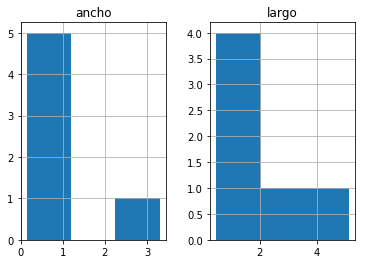

In [8]:
# define un DataFrame para animales con dos series y un indice=nombre_animal
animales = pd.DataFrame({
     'largo': [1.5, 0.5, 1.2, 0.9, 3, 5.1],
     'ancho': [0.7, 0.2, 0.15, 0.2, 1.1, 3.3]
     }, index= ['cerdo', 'conejo', 'pato', 'gallina', 'caballo', 'vaca'])
# Imprime un histograma con solo 3 columnas
animales.hist(bins=3)

### 1.3. Acceso a los datos en el DataFrame
Los datos en el dataFrame pueden ser accedidos utilizando cualquiera de las operaciones `dict` / `list` en Python:


In [10]:
# pd fue definido en el ejemplo 1.2.1 (arriba ^)
pciudades = pd.DataFrame({ 'Ciudad': ciudades, 'Poblacion': poblacion })

# usando el comando print para imprimir
print(type(pciudades['Ciudad']))
pciudades['Ciudad']


<class 'pandas.core.series.Series'>


0    San Francisco
1          Sevilla
2         Portugal
Name: Ciudad, dtype: object

In [11]:
# imprime la primera fila de la columna ciudad
print(type(pciudades['Ciudad'][1]))
pciudades['Ciudad'][1]


<class 'str'>


'Sevilla'

In [12]:
# imprime las dos primeras filas 0 y 1 de la tabla
print(type(pciudades[0:2]))
pciudades[0:2]


<class 'pandas.core.frame.DataFrame'>


,Ciudad,Poblacion
0,San Francisco,1250000
1,Sevilla,105000


Pandas contine una lista de funciones muy completa para manejar indices y seleccionar elementos en un dataFrame. Para mas detalles visite: http://pandas.pydata.org/pandas-docs/stable/indexing.html

### 1.3 Manipulacion de Datos
Es posible aplicar las operaciones basicas de Python a tipo `Series`.  Por ejemplo:


In [13]:
poblacion/1000

0    1250.0
1     105.0
2     350.0
dtype: float64

NumPy es una libreria cientifica para computacion que acepta las Series de Pandas como argumento para una gran mayoria de las funciones:


In [14]:
# importando numpy library
import numpy as np

# funcion logaritmica de la serie poblacion
np.log(poblacion)

0    14.038654
1    11.561716
2    12.765688
dtype: float64

Para transformaciones mas complejas (de una sola columna) se puede usar `Series.apply()`.  Esta funcion acepta como argumento una funcion lambda, que es aplicada a cada valor de la serie.

Por ejemplo para crear una nueva serie que indica si la poblacion es mayor de un 300,000:
   

In [15]:
# Utilizando una funcion Lamba de Python (ver more en:  https://www.w3schools.com/python/python_lambda.asp o https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions)
Limite=300000
poblacion.apply(lambda val: val > Limite)


0     True
1    False
2     True
dtype: bool

`DataFrames` pueden ser modificados en forma similar.  Por ejemplo, para adicionar dos `Series` a un `DataFrame` Existente:


In [16]:
# Adicionando 'Area en millas'
pciudades['Area millas'] = pd.Series([46.87, 176.53, 97.92])
# Calculando la densidad poblacional y adicionando la serie al dataFrame
pciudades['Densidad poblacion'] = pciudades['Poblacion'] / pciudades['Area millas']

pciudades

,Ciudad,Poblacion,Area millas,Densidad poblacion
0,San Francisco,1250000,46.87,26669.511415
1,Sevilla,105000,176.53,594.799751
2,Portugal,350000,97.92,3574.346405


### 1.4 Ejercicios
##### 1.4.1 Ejercicio 1
Modifique la tabla de ciudades (pciudades) adicionando una nueva columna boolean que es cierta (True) si las siguientes dos condiciones son ciertas:

* La ciudad empieza con S
* La ciudad tiene un area mayor de 55 millas

In [17]:
pciudades['ejercicio1'] = (pciudades['Area millas']>55) & (pciudades['Ciudad'].apply(lambda name: name.startswith('S')))
pciudades

,Ciudad,Poblacion,Area millas,Densidad poblacion,ejercicio1
0,San Francisco,1250000,46.87,26669.511415,False
1,Sevilla,105000,176.53,594.799751,True
2,Portugal,350000,97.92,3574.346405,False


## 2. Indices 
Series y DataFrames contienen una propiedad que permite el manejo de indices, es decir existe un identificador para cada item en la Serie o   DataFrame.


Pandas asigna inicialmente indices con valores que reflejan el orden cuando los datos se cargaron.  Una vez creados, los valores del indice son estables, es decir, ellos no cambian cuando los datos se reordenan


In [18]:
ciudades.index

RangeIndex(start=0, stop=3, step=1)

In [19]:
pciudades.index

RangeIndex(start=0, stop=3, step=1)

Llamar DataFrame.reindex para reordernar las filas en forma manual.  Por ejemplo, para ordenar por nombre de ciudad:


In [20]:
pciudades.reindex([2, 0, 1])

,Ciudad,Poblacion,Area millas,Densidad poblacion,ejercicio1
2,Portugal,350000,97.92,3574.346405,False
0,San Francisco,1250000,46.87,26669.511415,False
1,Sevilla,105000,176.53,594.799751,True


Reindexar es una herramienta muy util para mezclar (al azar) un DataFrame. Por ejemplo, le podemos pasar un indice, en la forma de un arreglo, a la funcion `random.permutation` de NumPy, para que mezcle los valores.  La llamada de `reindex` con el resultado de `permutation` va a causar que el DataFrame se mezcle en la misma forma.


In [23]:
# mezcla el indice con "np.random.permutation"
pciudades.reindex(np.random.permutation(pciudades.index))


,Ciudad,Poblacion,Area millas,Densidad poblacion,ejercicio1
2,Portugal,350000,97.92,3574.346405,False
0,San Francisco,1250000,46.87,26669.511415,False
1,Sevilla,105000,176.53,594.799751,True
